결정트리(Decision Tree)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import graphviz

유방암 데이터

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [6]:
# 속성을 2개로 제한
X_train = X_train[:, :2]
X_test = X_test[:, :2]
X_train.shape, X_test.shape

((426, 2), (143, 2))

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

1.0 0.8811188811188811


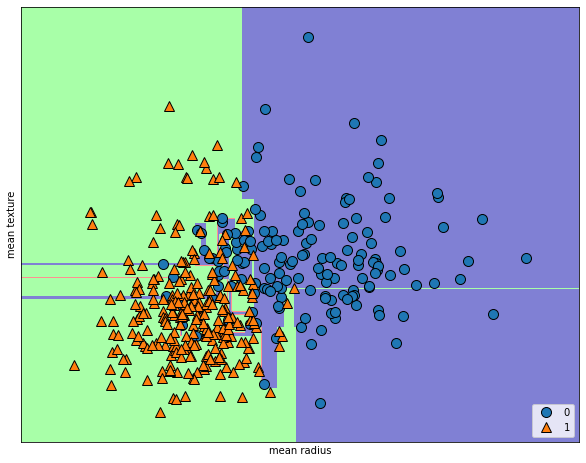

In [9]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

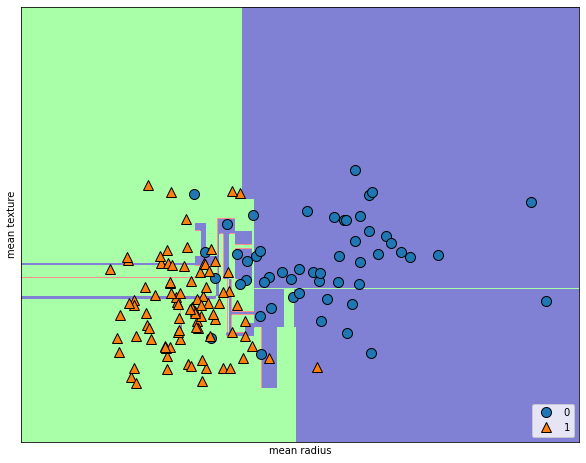

In [10]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

트리 그래프 그리기
- 아나콘다 프롬프터에서, "pip install graphviz" 실행
- http://www.graphviz.org 에서 "graphviz-3.0.0 (64-bit) EXE installer" 다운로드 및 설치
- "C:\Program Files\Graphviz\bin" 을 윈도우 PATH 에 추가
- 기존에 떠 있던 아나콘다 프롬프트를 모두 닫고 jupyter notebook 재실행

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

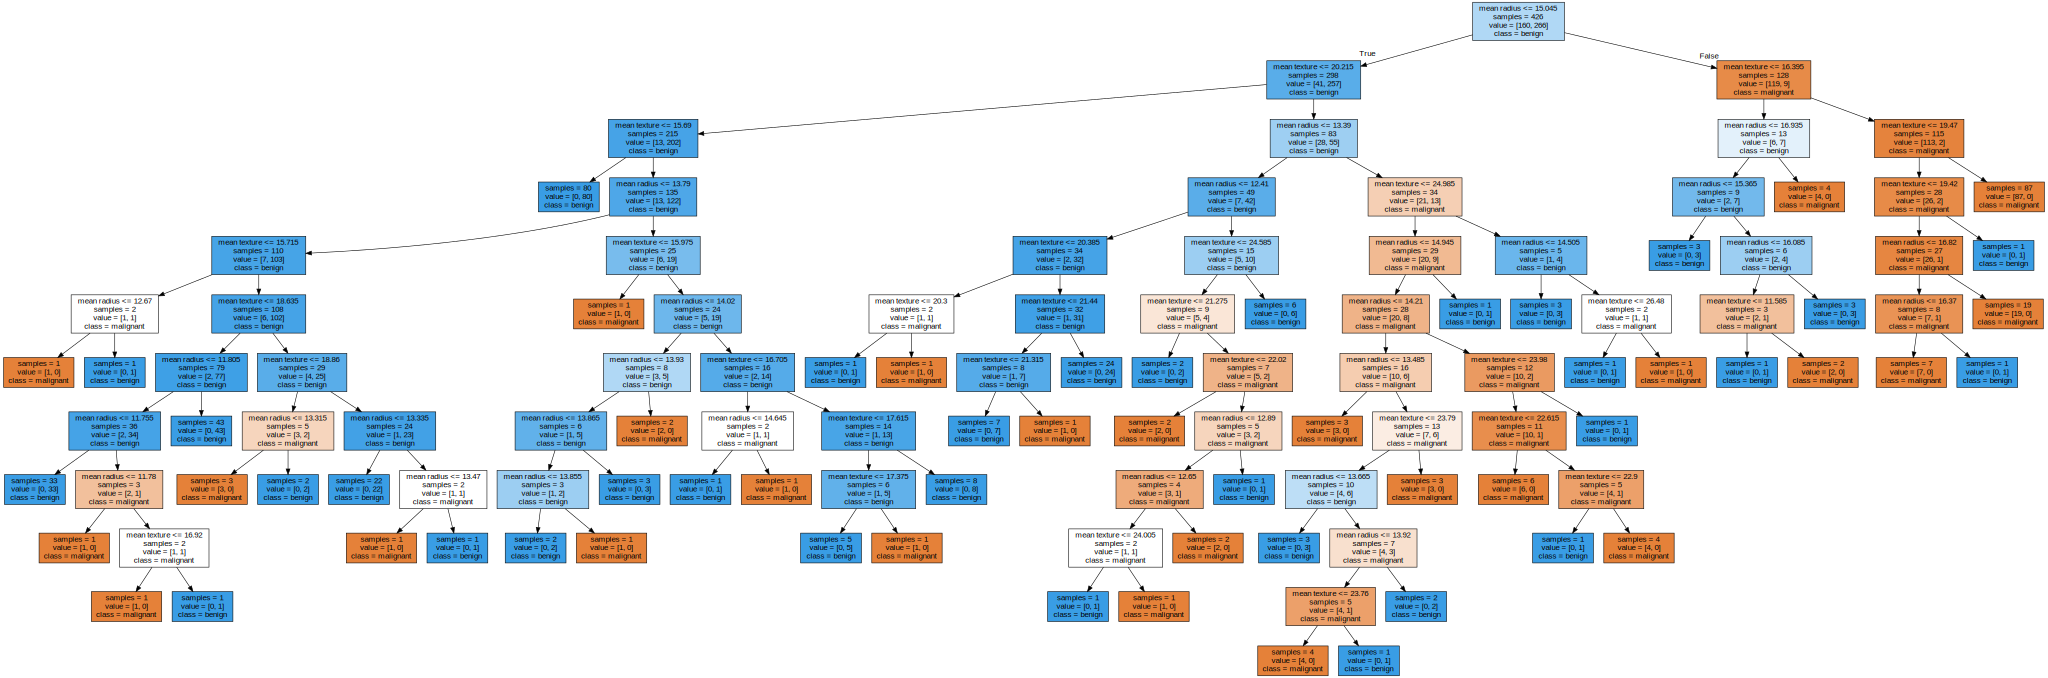

In [12]:
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [13]:
## 파일로 저장
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree')

'tree.png'

max_depth 옵션

In [14]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.8826291079812206 0.916083916083916


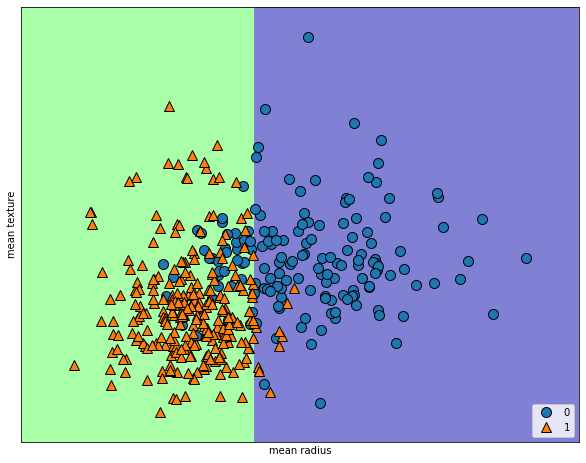

In [15]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

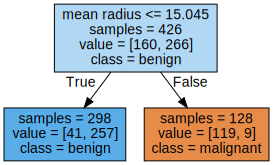

In [16]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [17]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.8849765258215962 0.9090909090909091


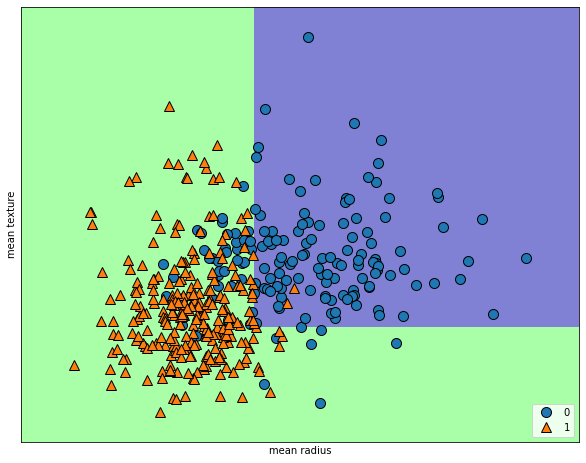

In [18]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

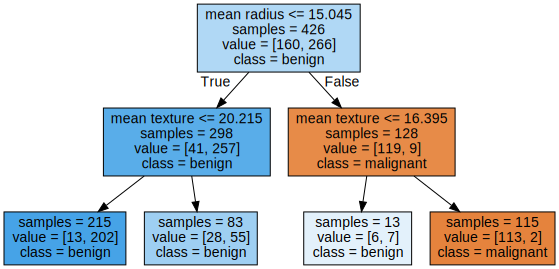

In [19]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [20]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.931924882629108 0.8951048951048951


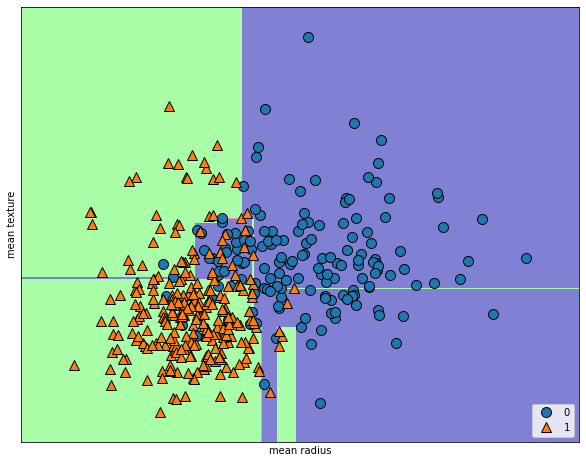

In [21]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

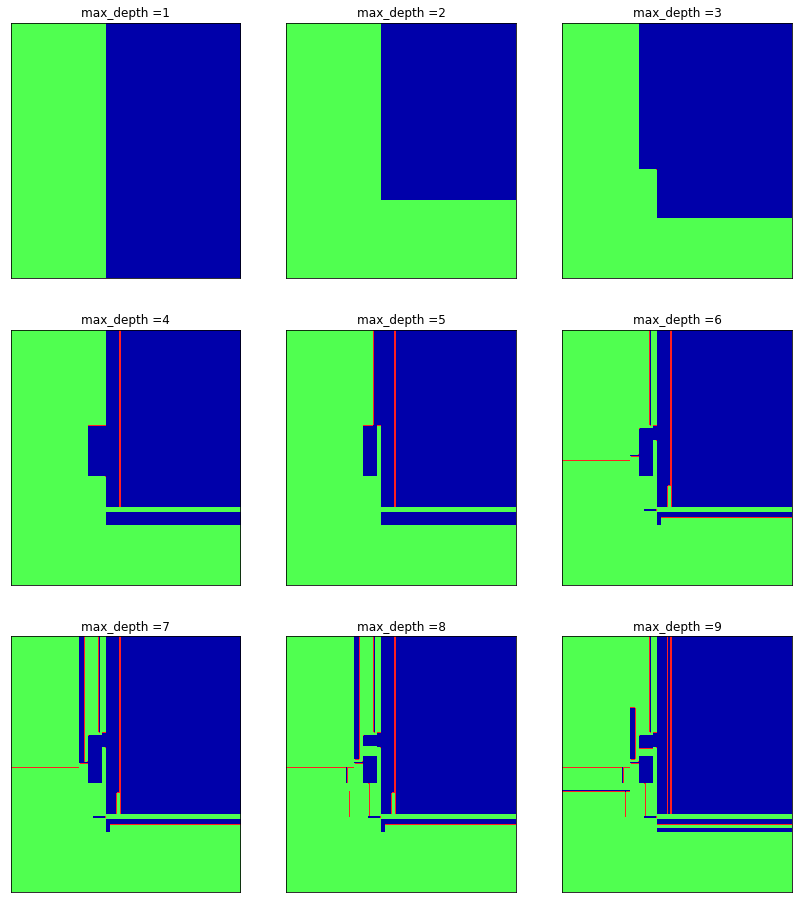

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,:2], cancer.target)

plt.figure(figsize=[14,16])
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=2020)
    model.fit(X_train, y_train)
    
    plt.subplot(3,3,depth)
    plt.title('max_depth ='+str(depth))
    mglearn.plots.plot_2d_classification(model, X_train)
    #mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, alpha=0.3)

전체 속성 사용

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [24]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9929577464788732 0.958041958041958


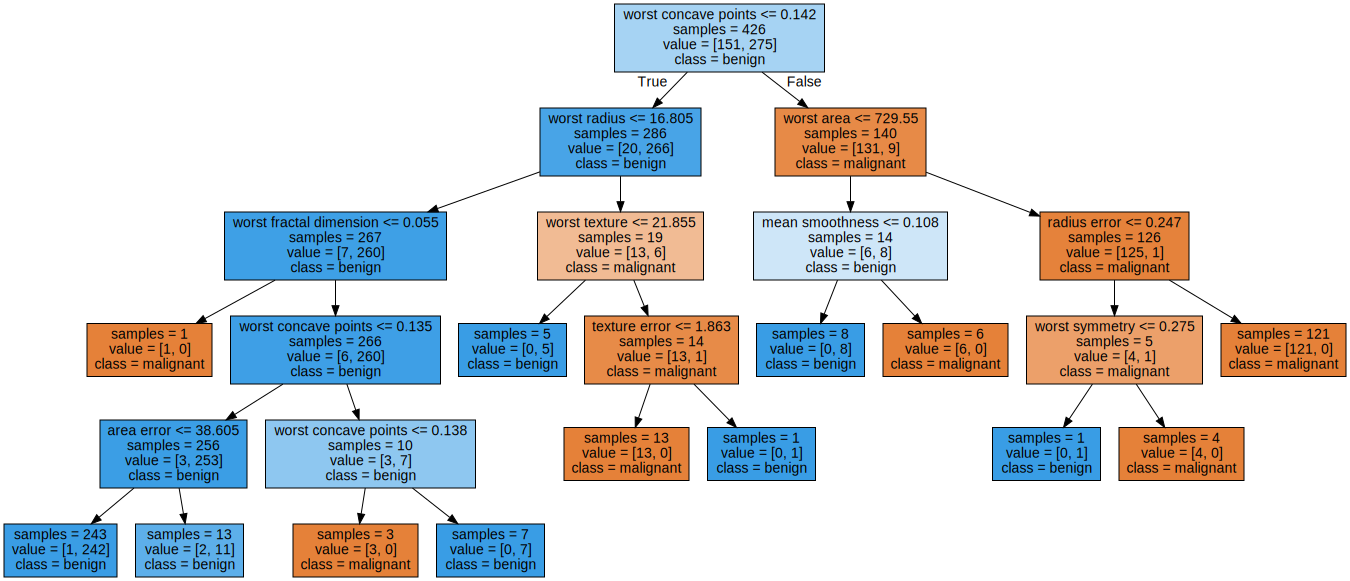

In [25]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

DecisionTreeClassifier 주요 옵션
- max_depth
- max_leaf_nodes : 총 잎노드의 갯수를 제한한다
- min_samples_split : 만일 10이라면, 노드의 샘플 갯수가 10이상이 되어야 분기를 한다.
- min_samples_leaf : 10이라면, 잎노드의 샘플 갯수는 10이상이 되도록 만든다.
- max_features : 분기를 할 때 고려하는 속성의 갯수이다. 만일 2라면 판단할 속성을 고를때 랜덤하게 속성 2개만 뽑아 그 중에서 기준을 세운다.

In [26]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [28]:
model = DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.971830985915493 0.8951048951048951


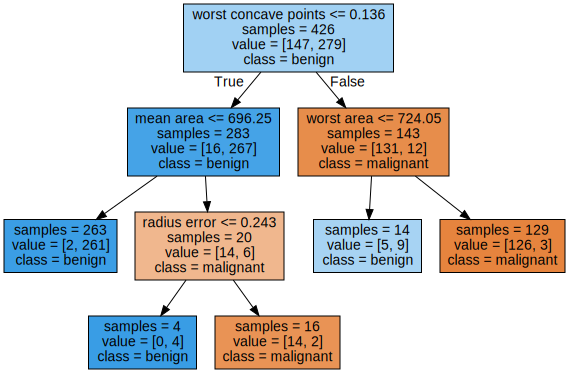

In [29]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

엔트로피
- 결정트리는 가장 잘 나누는 속성을 선택하고 경계값을 결정하기 위해 엔트로피(entropy) 라는 개념을 사용
- 엔트로피를 최대한 낮추는 것이 목표임
- 엔트로피 개념은 신경망에서 중요하게 사용됨